<a href="https://colab.research.google.com/github/WENDELLDELIMA/kmeans-customer-segmentation/blob/main/Departamento_de_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEPARTAMENTO DE MARKETING

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
dfCartao = pd.read_csv('/content/Marketing_data.csv')
dfCartao.shape

(8950, 18)

In [4]:
dfCartao.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
dfCartao.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
dfCartao.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
dfCartao[dfCartao['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


**VISUALIZACAO E EXPLORACAO DE DADOS**

<Axes: >

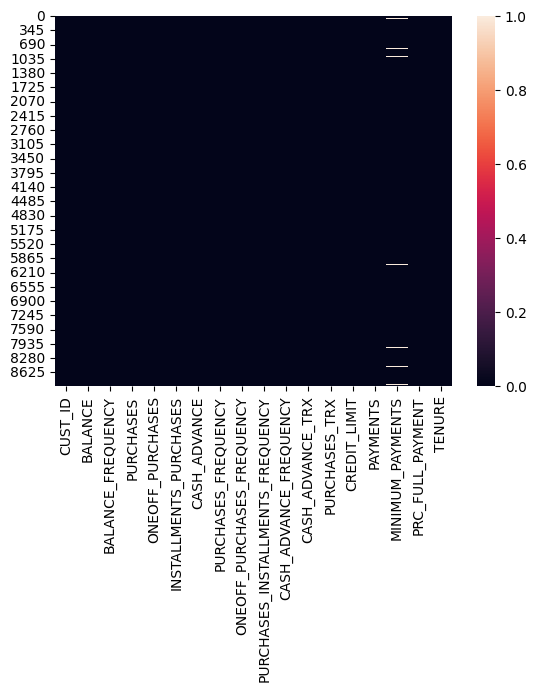

In [10]:
#verificando registros nulos.
sns.heatmap(dfCartao.isnull())

In [16]:
dfCartao.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [15]:
#preenchendo valores nulos com a media.
dfCartao.loc[(dfCartao['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = dfCartao['MINIMUM_PAYMENTS'].mean()
dfCartao.loc[(dfCartao['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = dfCartao['CREDIT_LIMIT'].mean()

In [14]:
dfCartao['MINIMUM_PAYMENTS'].mean()

864.2065423050827

In [17]:
dfCartao.duplicated().sum()

0

In [18]:
dfCartao.drop('CUST_ID', axis=1, inplace = True)

In [19]:
dfCartao.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
dfCartao.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

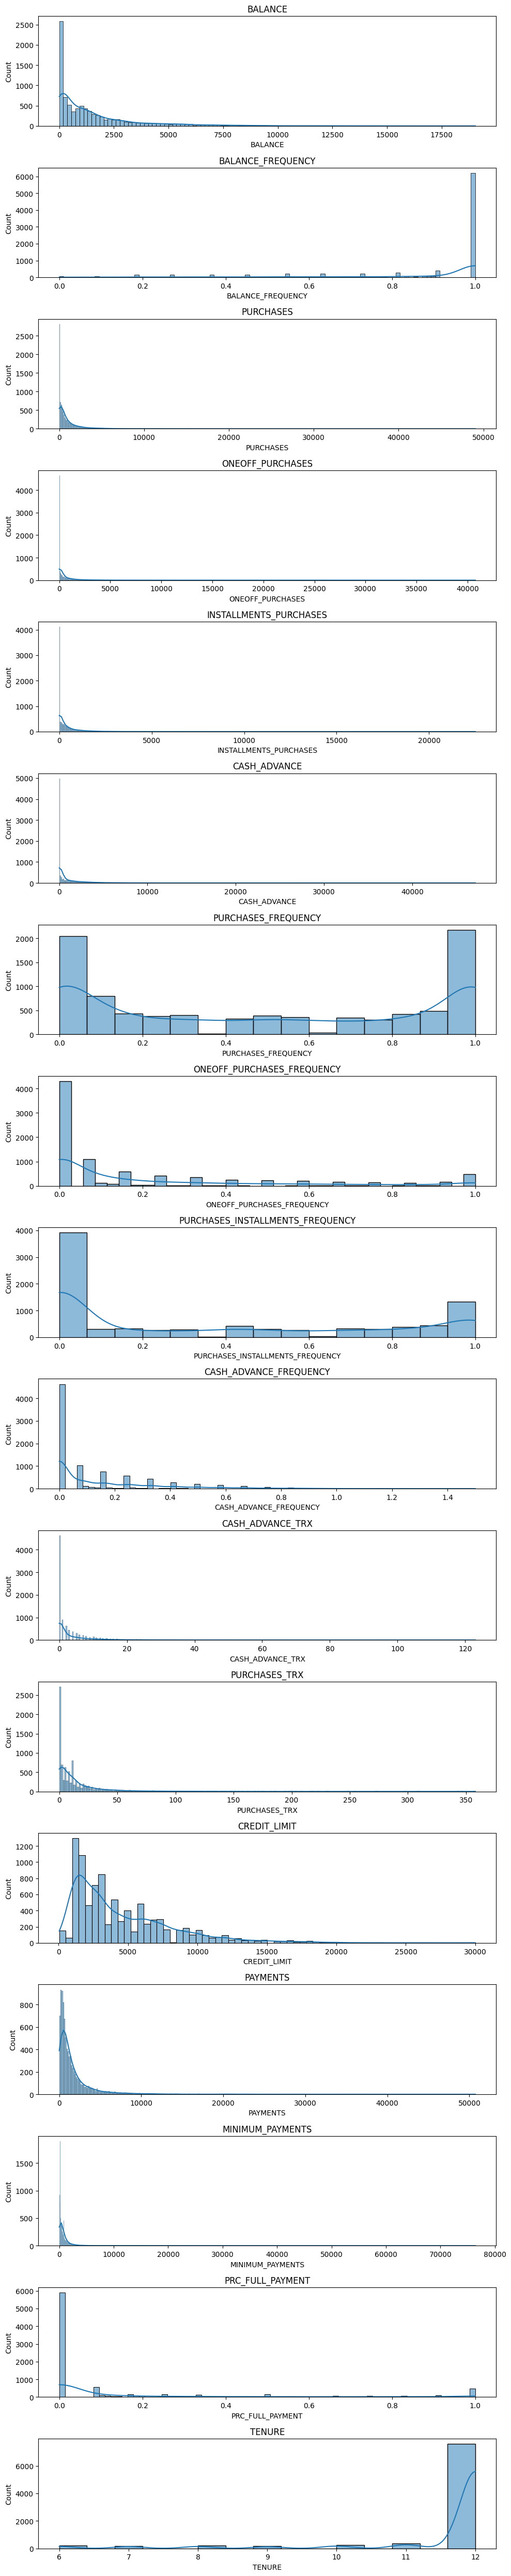

In [26]:
plt.figure(figsize=(10,50))
for i in range(len(dfCartao.columns)):
  plt.subplot(17,1, i+1)
  sns.histplot(dfCartao[dfCartao.columns[i]], kde = True)
  plt.title(dfCartao.columns[i]);
plt.tight_layout()

In [28]:
correlations = dfCartao.corr()

<Axes: >

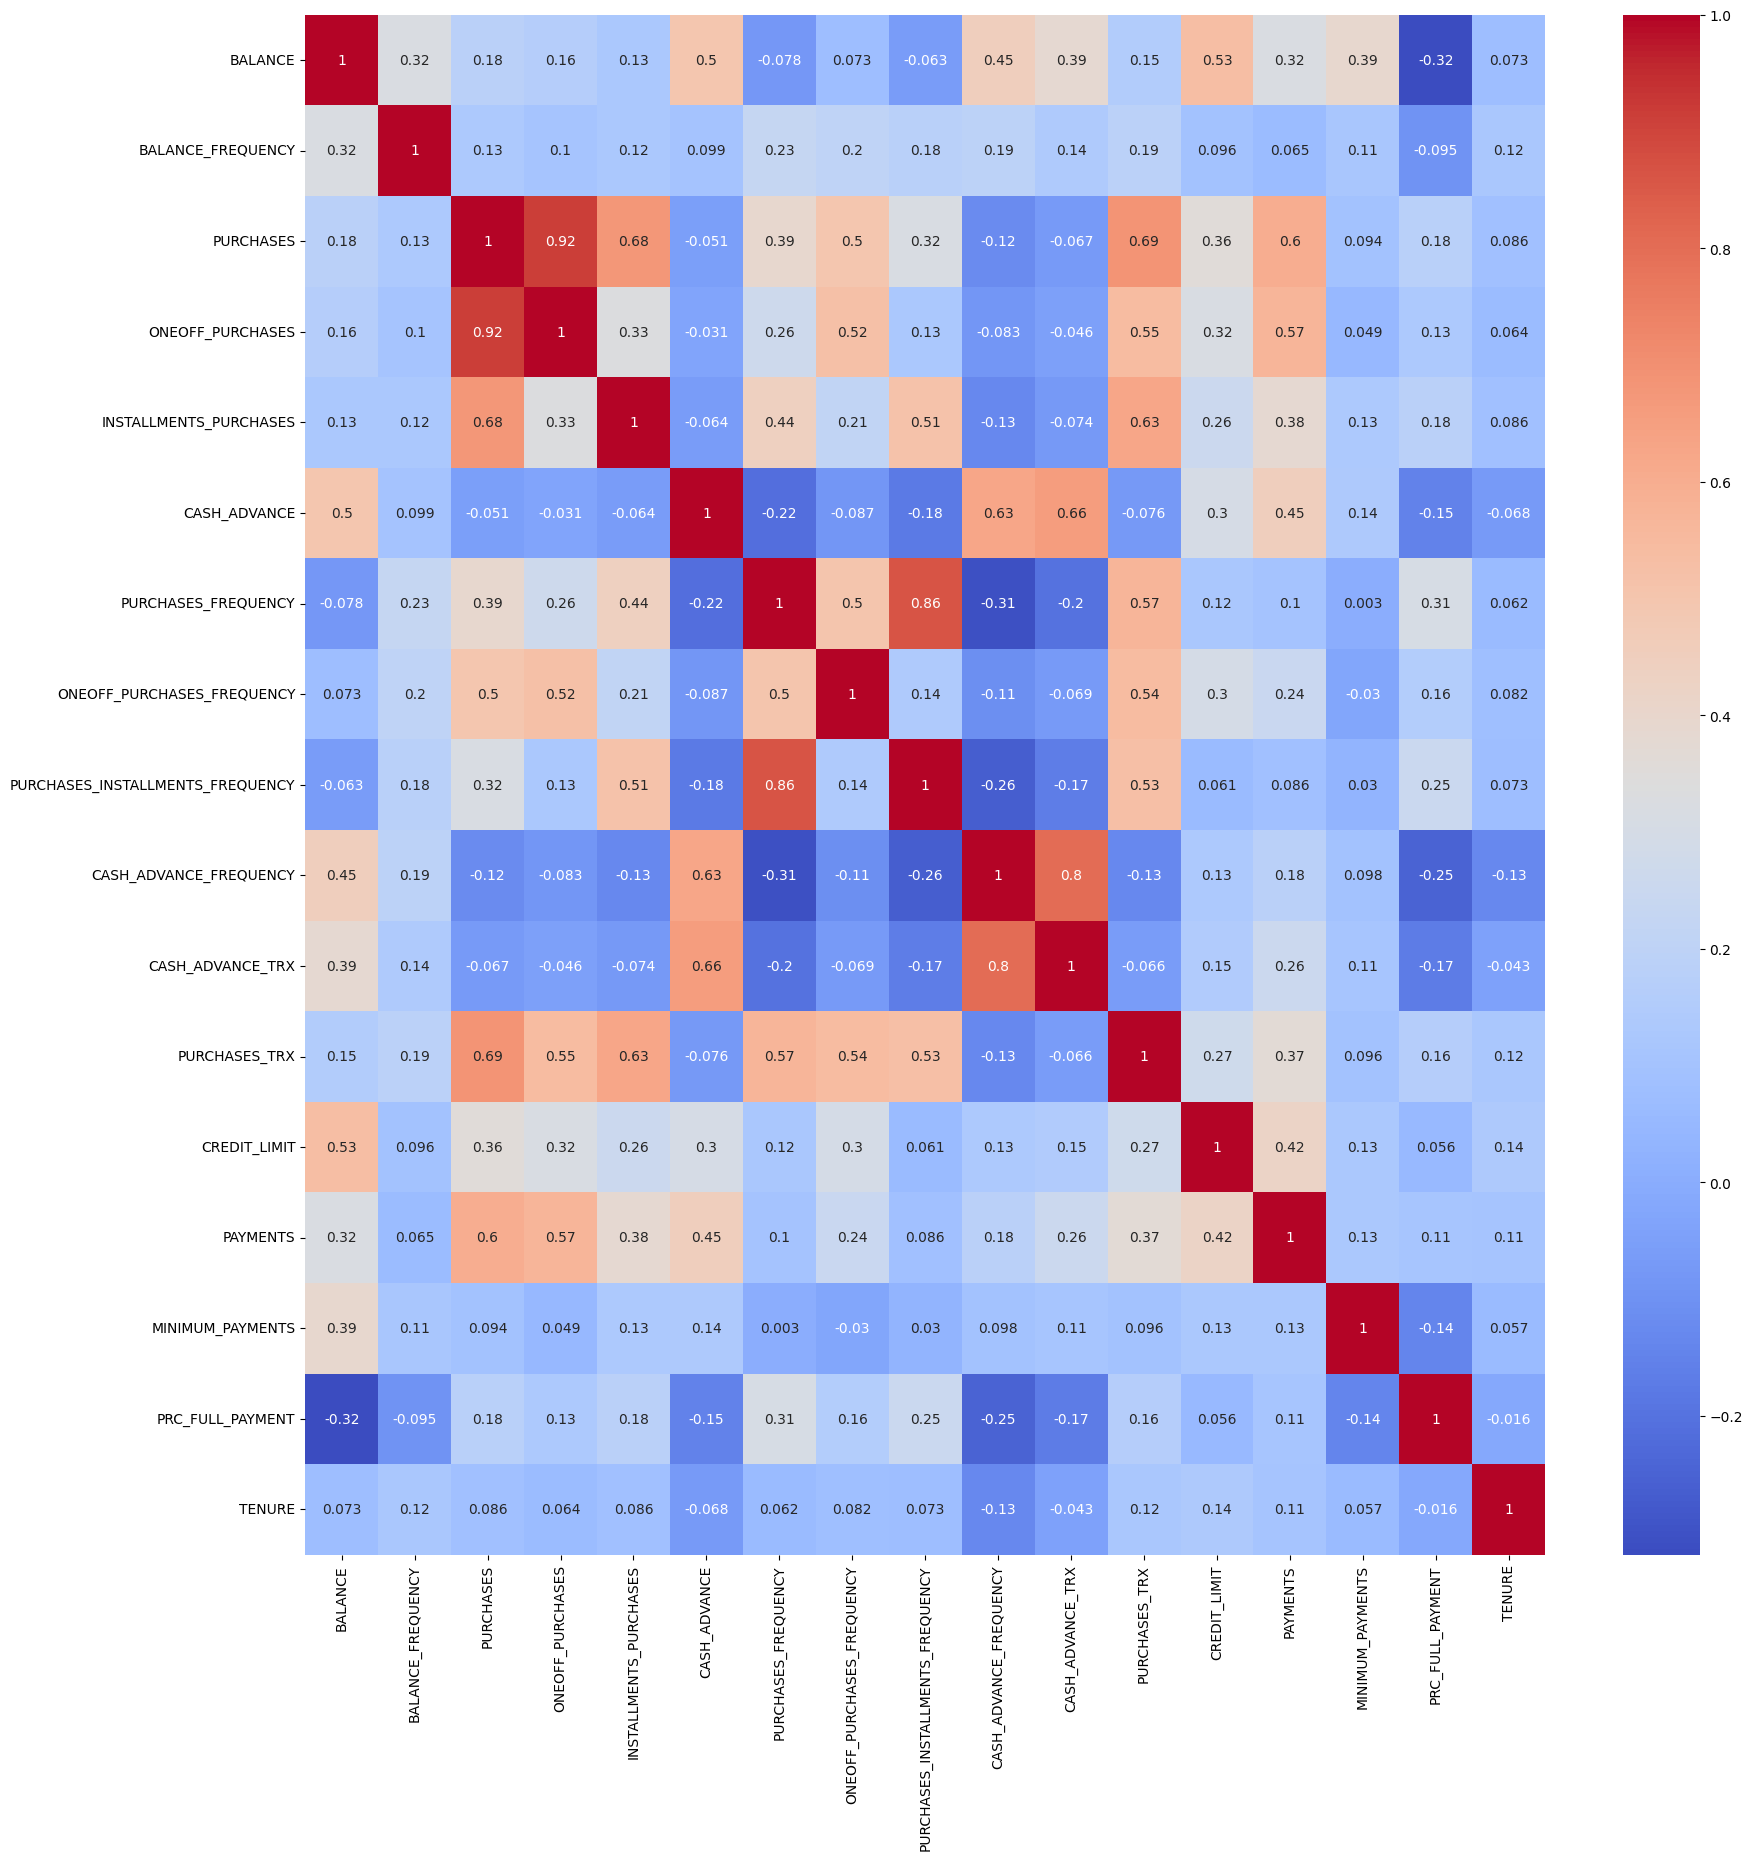

In [33]:
f, ax = plt.subplots(figsize=(20,20))
ax.set_facecolor('g')
sns.heatmap(correlations, annot=True, ax=ax,cmap='coolwarm')

#definindo numero ideal de clusters usando elbow method

In [34]:
min(dfCartao['BALANCE']),max(dfCartao['BALANCE'])

(0.0, 19043.13856)

In [35]:
scaler = StandardScaler()
dfCartaoScalado = scaler.fit_transform(dfCartao)

In [37]:
min(dfCartaoScalado[0]),max(dfCartaoScalado[0])

(-0.9604333444542572, 0.36067954425377496)

In [40]:
wcss1 = []
range_values = range(1,20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(dfCartaoScalado)
  wcss1.append(kmeans.inertia_);


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [41]:
print(wcss1)

[152149.99999999875, 127784.93051423284, 111986.74707959268, 99074.37694761835, 91502.98259428954, 84851.13240432608, 79527.51275101633, 74807.63795264949, 71229.30650362978, 66479.09525600396, 63638.07597057142, 61357.20363342698, 59150.10757394922, 57494.219948027785, 56137.15479998068, 54833.53428276931, 53229.696430356984, 51742.507044149206, 50627.98940575175]


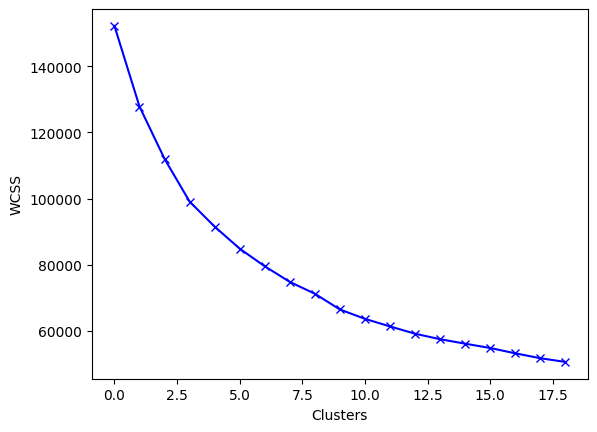

In [43]:
plt.plot(wcss1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

#Agrupamento com K-means

In [76]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(dfCartaoScalado)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
labels

array([7, 6, 3, ..., 4, 4, 4], dtype=int32)

In [78]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32),
 array([1180,  423, 2016, 1096,  622,   30,  859, 2724]))

In [86]:
kmeans.cluster_centers_

array([[-7.01229283e-01, -2.14411628e+00, -3.11098786e-01,
        -2.35720118e-01, -3.02413627e-01, -3.21904751e-01,
        -5.56586290e-01, -4.44988775e-01, -4.39729749e-01,
        -5.20843751e-01, -3.76102518e-01, -4.19789965e-01,
        -1.77161361e-01, -2.02048177e-01, -2.56658204e-01,
         2.81550499e-01,  1.99199458e-01],
       [ 9.01817094e-01,  4.66986488e-01,  2.27096268e+00,
         1.75693590e+00,  2.14191957e+00, -1.95511636e-01,
         1.15862945e+00,  1.58388866e+00,  1.22619838e+00,
        -3.12181377e-01, -2.12097314e-01,  2.78145233e+00,
         1.23894709e+00,  1.29029506e+00,  4.41655026e-01,
         3.04777847e-01,  3.34181630e-01],
       [-3.64778062e-01,  3.33613299e-01, -3.73814336e-02,
        -2.44338634e-01,  3.60315673e-01, -3.63588884e-01,
         9.90669183e-01, -3.87078511e-01,  1.20608141e+00,
        -4.75237753e-01, -3.61152513e-01,  1.87665863e-01,
        -2.60924517e-01, -2.16885725e-01, -3.26595444e-02,
         3.13849102e-01,  2.5

In [87]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dfCartao.columns])

In [88]:
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.70123,-2.14412,-0.31110,-0.23572,-0.30241,-0.32190,-0.55659,-0.44499,-0.43973,-0.52084,-0.37610,-0.41979,-0.17716,-0.20205,-0.25666,0.28155,0.19920
1,0.90182,0.46699,2.27096,1.75694,2.14192,-0.19551,1.15863,1.58389,1.22620,-0.31218,-0.21210,2.78145,1.23895,1.29030,0.44166,0.30478,0.33418
2,-0.36478,0.33361,-0.03738,-0.24434,0.36032,-0.36359,0.99067,-0.38708,1.20608,-0.47524,-0.36115,0.18767,-0.26092,-0.21689,-0.03266,0.31385,0.25764
3,-0.16525,0.39220,0.45335,0.59317,-0.01797,-0.33391,0.94330,1.87836,0.08901,-0.40767,-0.32338,0.52373,0.37358,0.08656,-0.16261,0.40635,0.26105
4,-0.33605,-0.34708,-0.28927,-0.21597,-0.28684,0.06828,-0.20308,-0.28866,-0.22455,0.30866,0.00100,-0.38812,-0.56716,-0.39268,-0.20915,0.01401,-3.20373
5,1.92305,0.33772,11.21204,10.60037,7.03312,0.41963,1.04698,1.91550,0.98133,-0.25891,0.06123,5.36244,3.04406,8.09897,1.12032,1.11013,0.31086
6,1.69832,0.39310,-0.21546,-0.15453,-0.22563,2.02567,-0.47145,-0.21050,-0.40916,1.92084,1.94143,-0.26312,1.04017,0.82834,0.55735,-0.39233,0.07134
7,0.01949,0.40315,-0.36186,-0.24697,-0.40178,-0.08662,-0.86750,-0.41051,-0.75867,0.11563,-0.02070,-0.48686,-0.30513,-0.24817,-0.00841,-0.45647,0.27180


In [89]:
# Supondo que 'scaler' e 'cluster_centers' já tenham sido definidos
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=dfCartao.columns)

# Configuração para desativar a notação científica no DataFrame
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Exibindo o DataFrame
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,104.92527,0.36935,338.53748,201.19025,137.59875,303.82181,0.26697,0.06971,0.18968,0.03092,0.68220,4.27542,3849.86394,1148.23418,266.07542,0.23606,11.78390
1,3441.53099,0.98790,5855.15161,3508.59111,2347.97894,568.87408,0.95536,0.67496,0.85176,0.07267,1.80142,83.84634,9002.24586,5468.42161,1893.46495,0.24286,11.96454
2,805.22008,0.95630,923.33882,186.88528,736.89664,216.40824,0.88795,0.08698,0.84376,0.04004,0.78423,19.37450,3545.09931,1105.28093,788.09485,0.24551,11.86210
3,1220.51499,0.97018,1971.79268,1576.97245,394.82023,278.63746,0.86894,0.76281,0.39981,0.05357,1.04201,27.72785,5853.67787,1983.71789,485.26232,0.27256,11.86667
4,865.01598,0.79505,385.18172,233.97797,151.68606,1122.06494,0.40885,0.11634,0.27520,0.19691,3.25563,5.06270,2430.89140,596.37383,376.80293,0.15781,7.22990
5,5567.14216,0.95727,24957.90500,18186.87567,6771.02933,1858.84461,0.91056,0.77389,0.75444,0.08333,3.66667,148.00000,15570.00000,25178.88269,3475.05948,0.47841,11.93333
6,5099.39395,0.97039,542.86448,335.95091,207.03179,5226.79067,0.30113,0.13966,0.20183,0.51952,16.49767,8.16977,8279.01691,4131.11400,2163.09299,0.03896,11.61279
7,1605.04761,0.97277,230.07791,182.51543,47.74416,797.22329,0.14218,0.07999,0.06292,0.15828,3.10756,2.60830,3384.27558,1014.71818,844.60325,0.02020,11.88106


In [93]:
creditcard_df_cluster = pd.concat([dfCartao, pd.DataFrame({'cluster': labels})], axis=1)

creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.90075,0.81818,95.40000,0.00000,95.40000,0.00000,0.16667,0.00000,0.08333,0.00000,0,2,1000.00000,201.80208,139.50979,0.00000,12,7
1,3202.46742,0.90909,0.00000,0.00000,0.00000,6442.94548,0.00000,0.00000,0.00000,0.25000,4,0,7000.00000,4103.03260,1072.34022,0.22222,12,6
2,2495.14886,1.00000,773.17000,773.17000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0,12,7500.00000,622.06674,627.28479,0.00000,12,3
3,1666.67054,0.63636,1499.00000,1499.00000,0.00000,205.78802,0.08333,0.08333,0.00000,0.08333,1,1,7500.00000,0.00000,864.20654,0.00000,12,7
4,817.71434,1.00000,16.00000,16.00000,0.00000,0.00000,0.08333,0.08333,0.00000,0.00000,0,1,1200.00000,678.33476,244.79124,0.00000,12,7


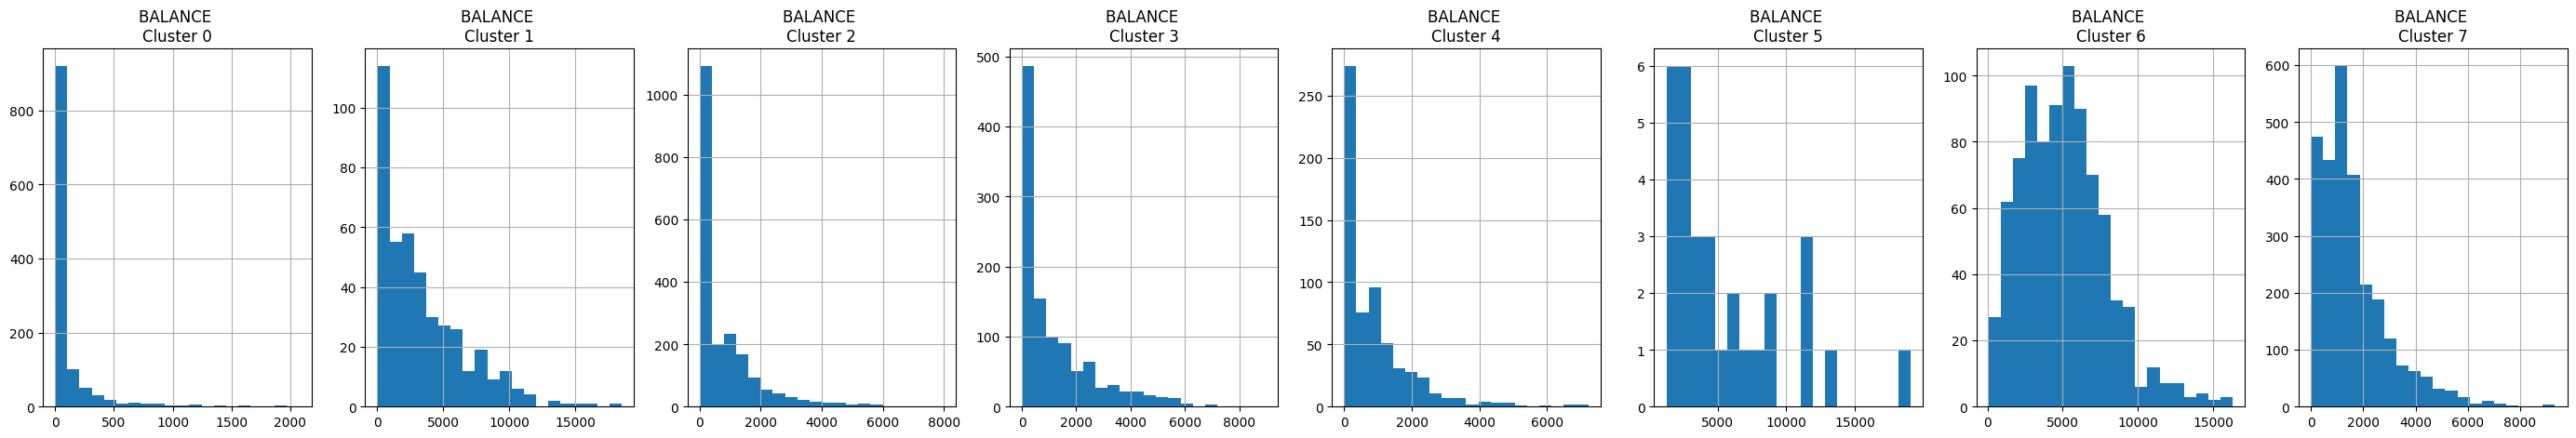

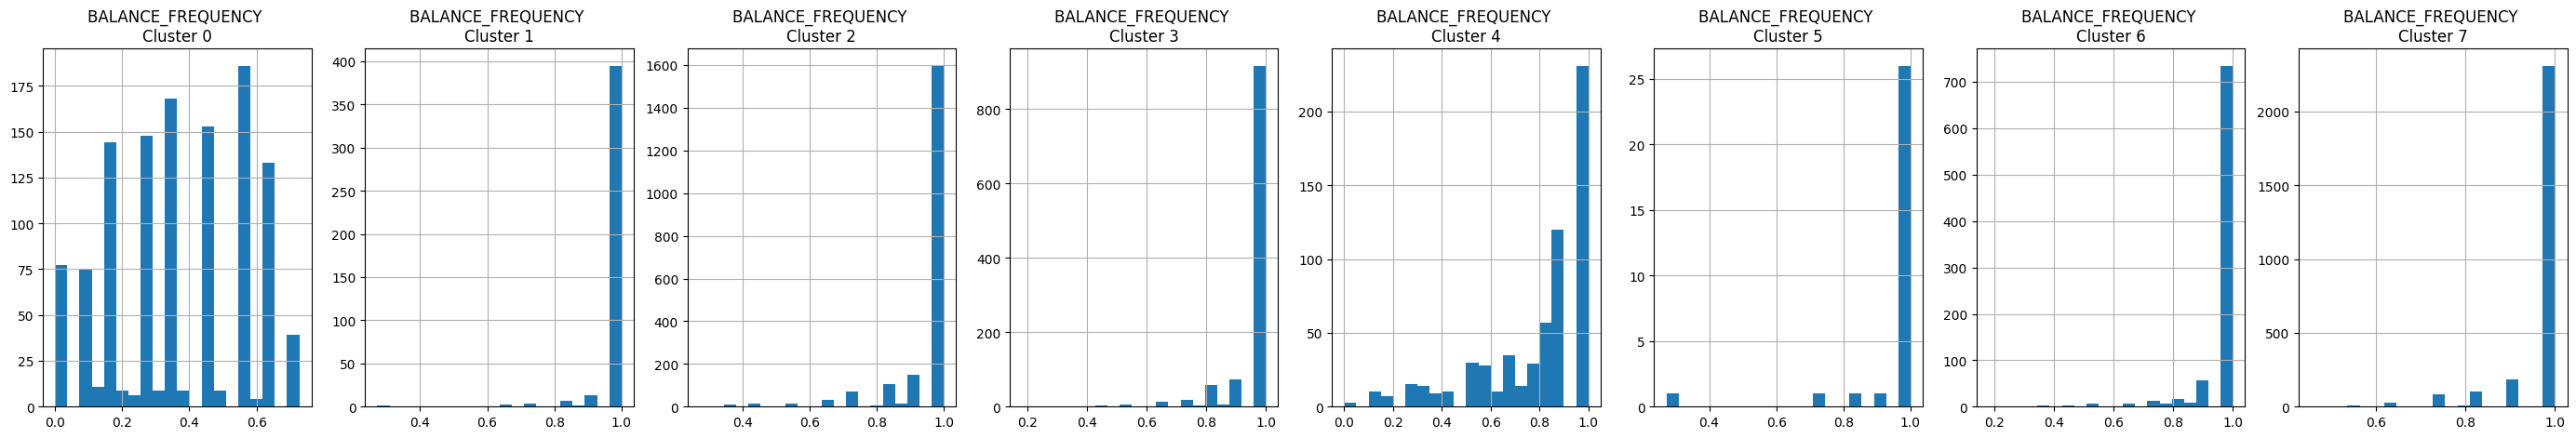

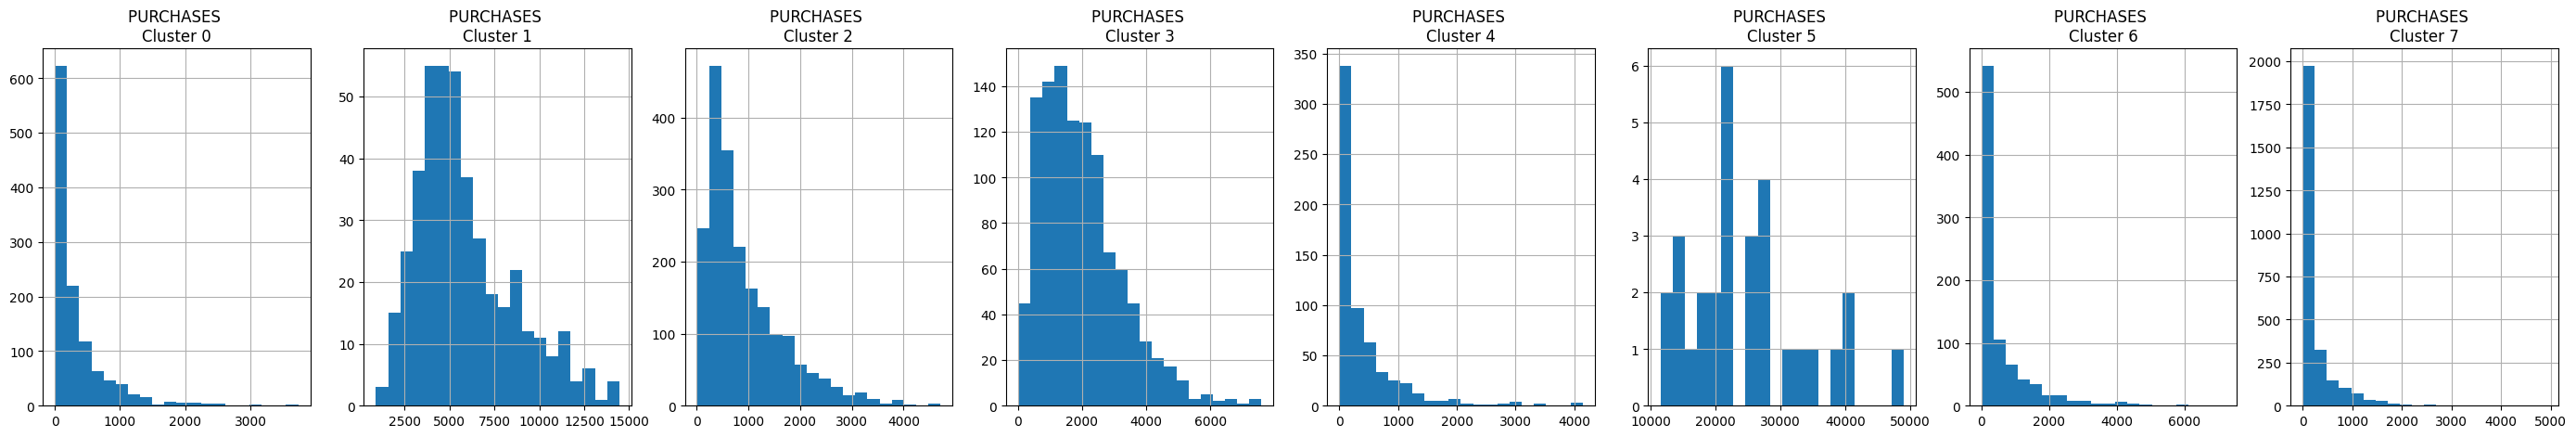

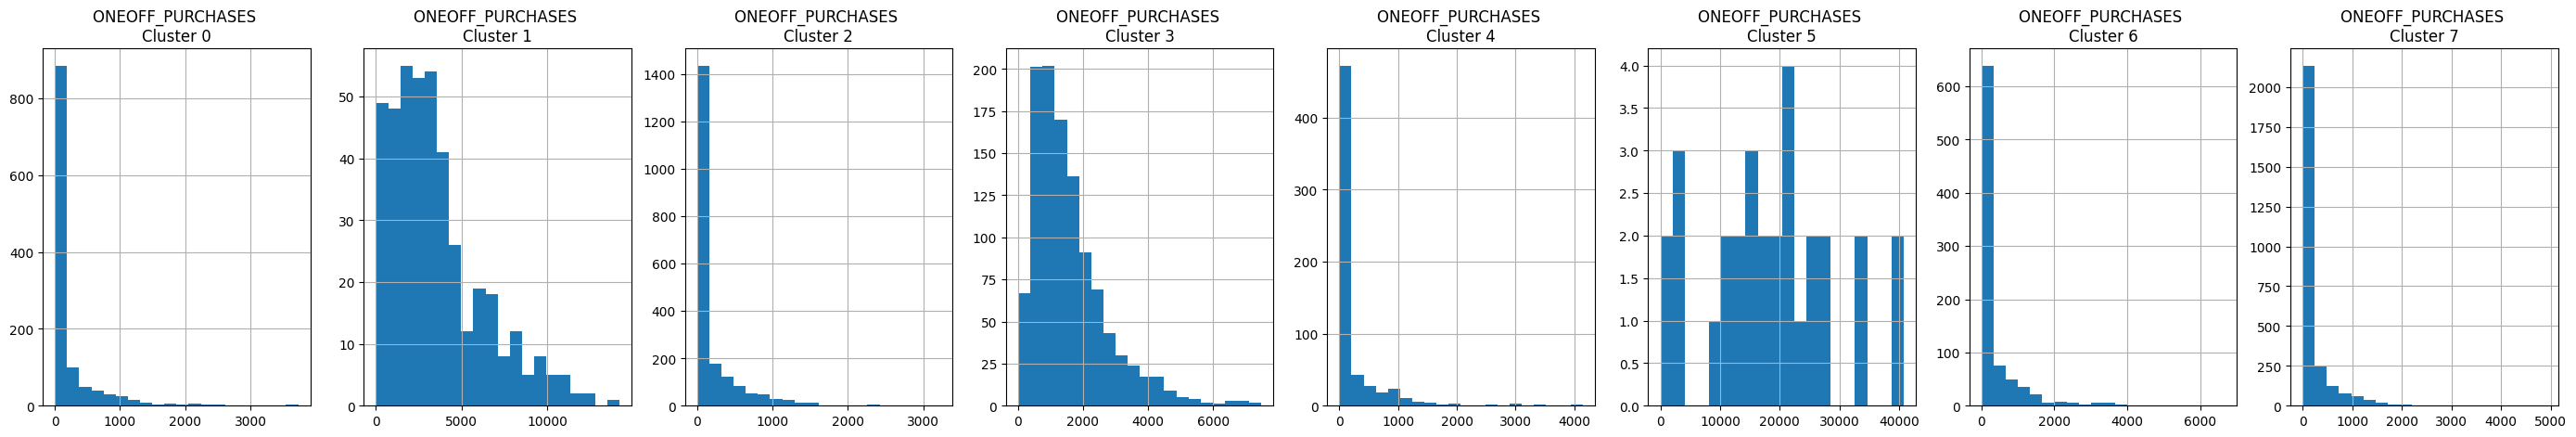

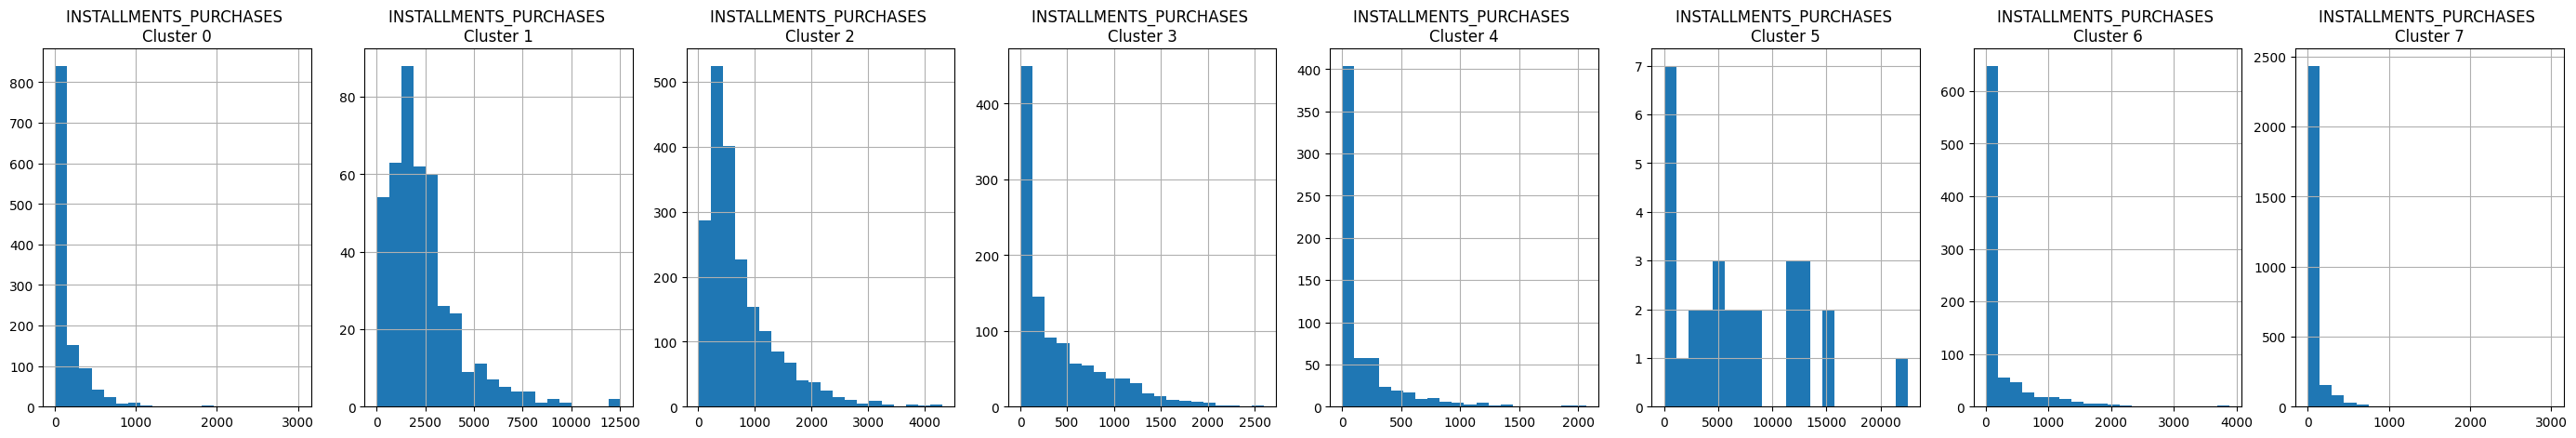

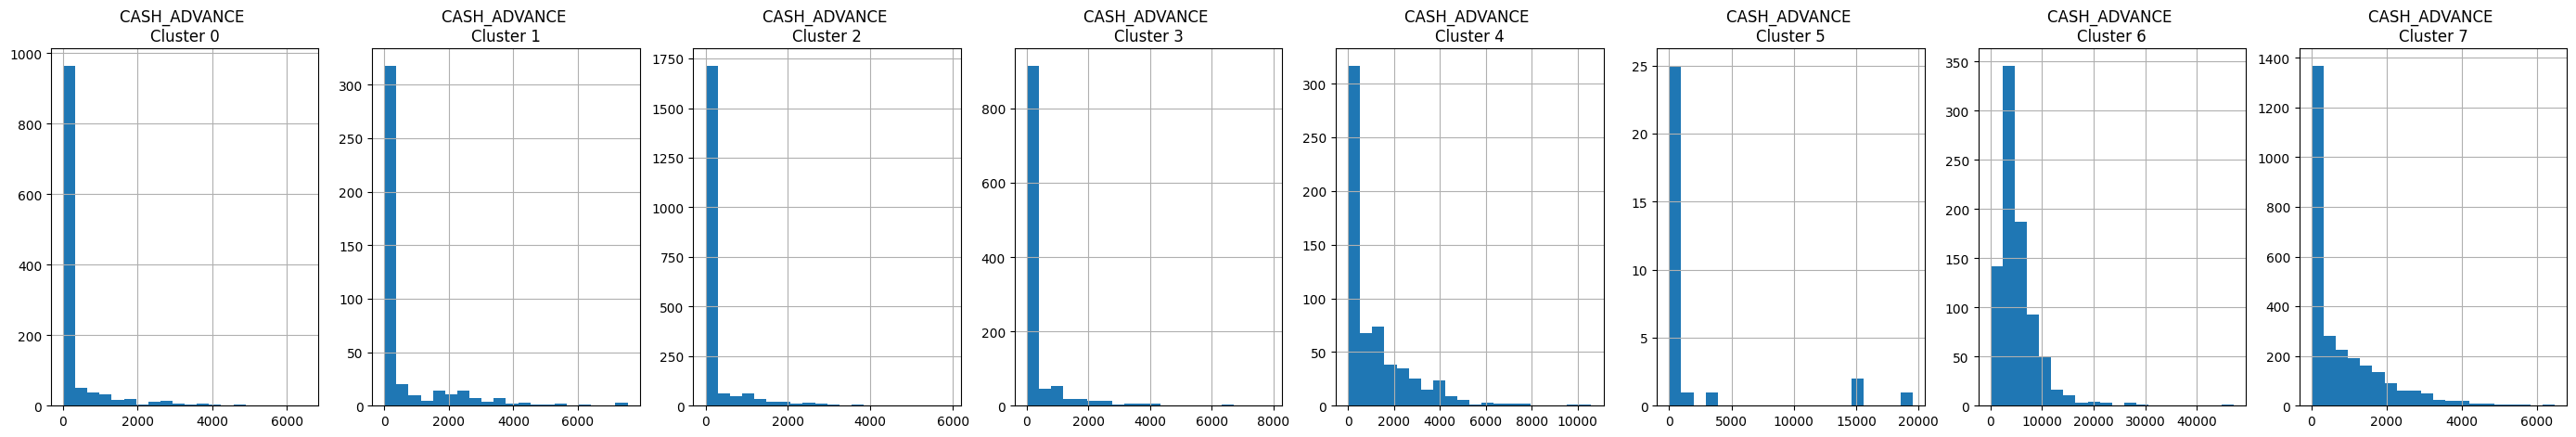

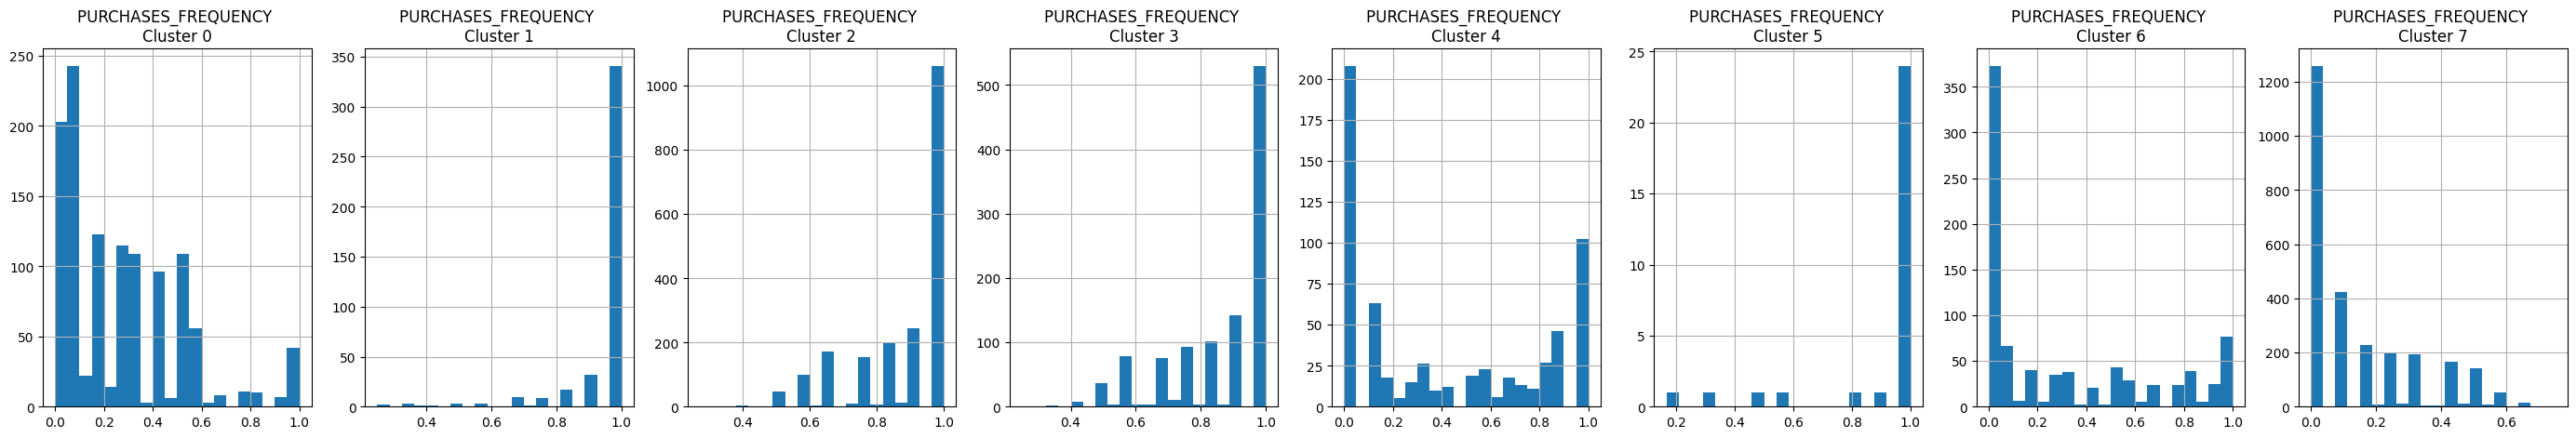

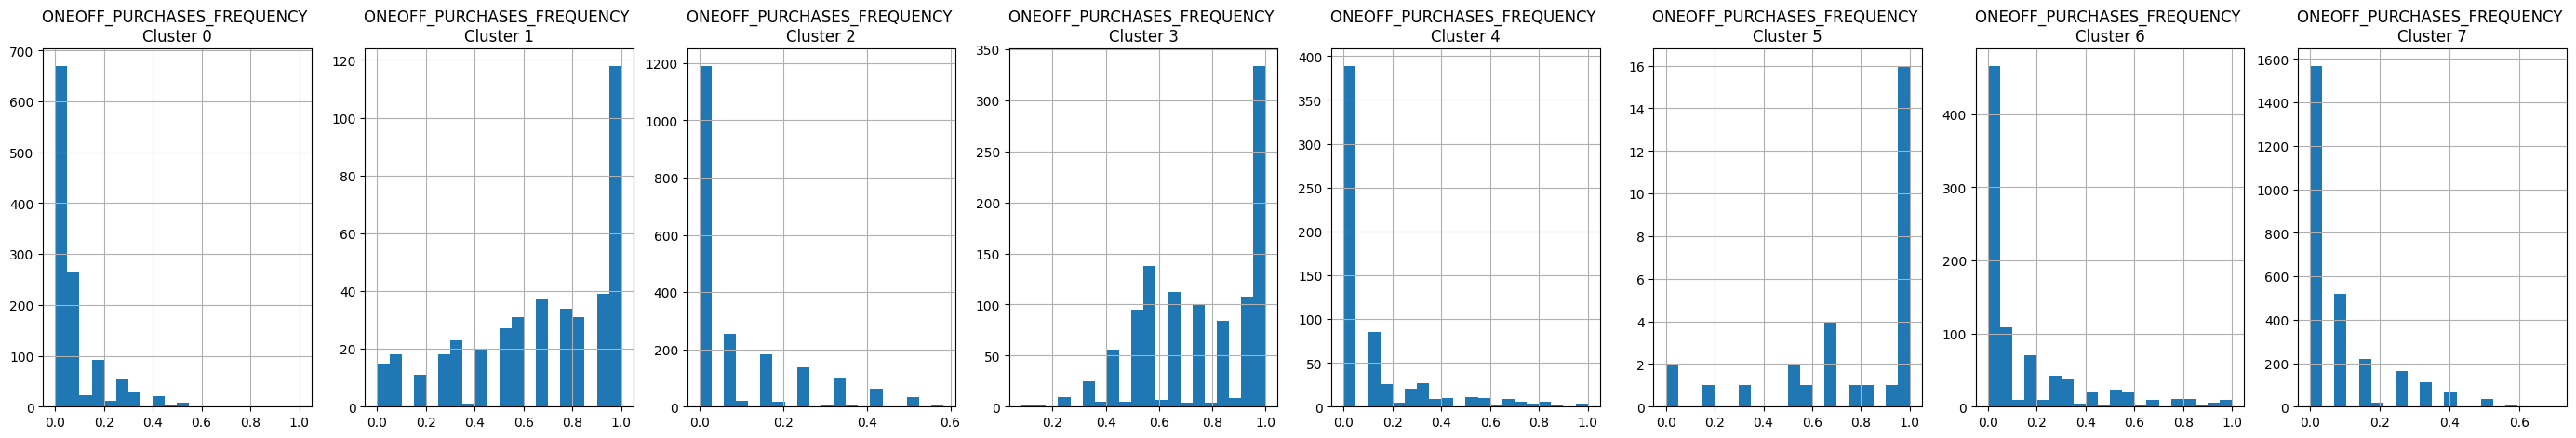

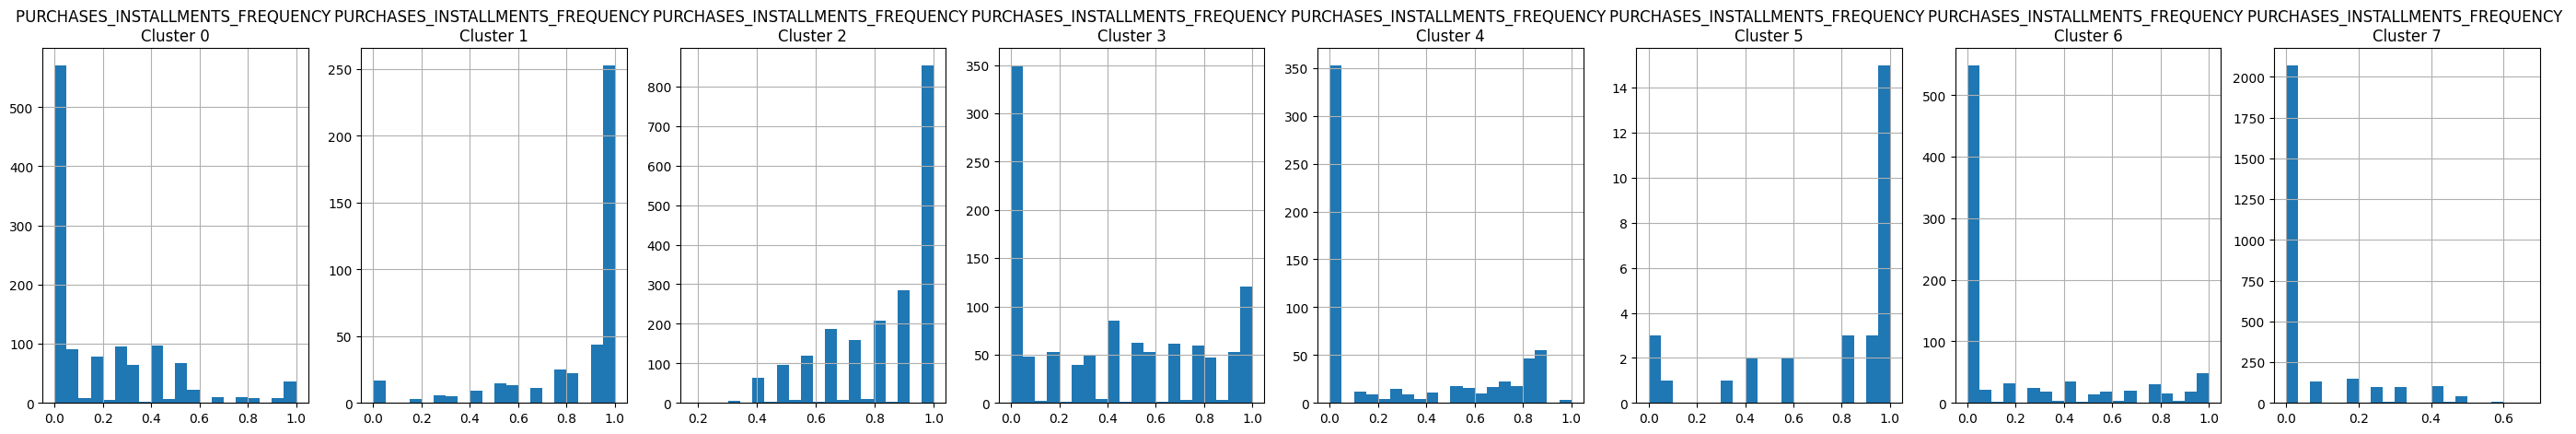

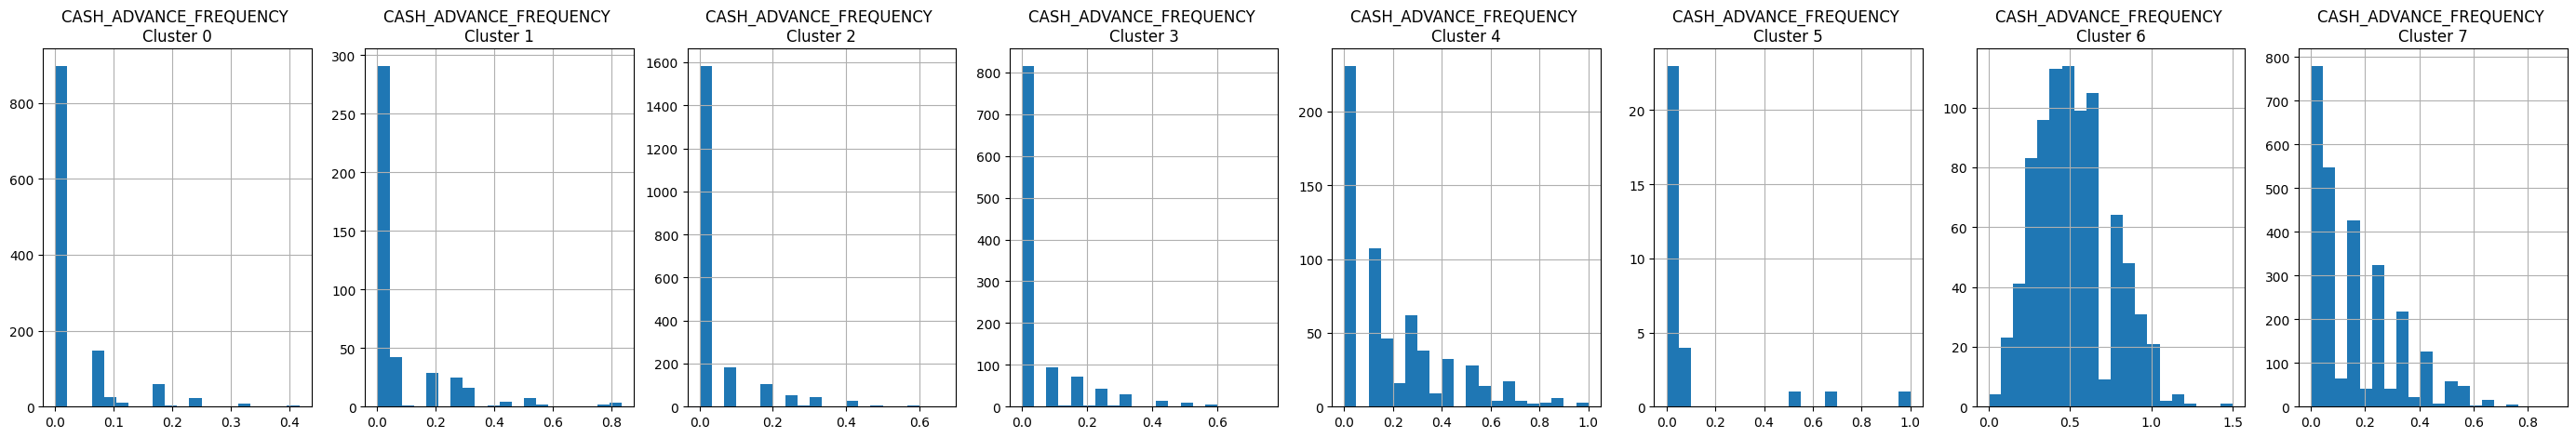

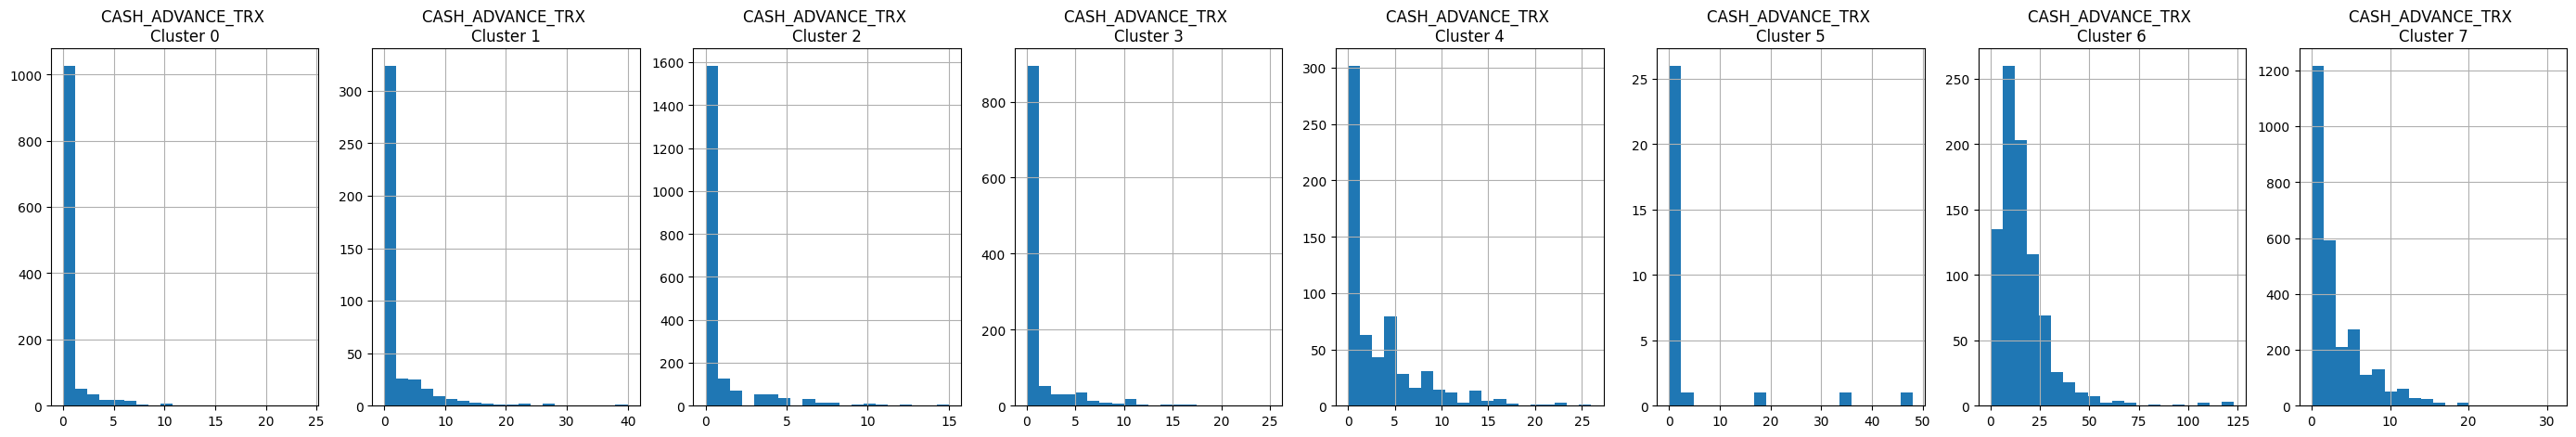

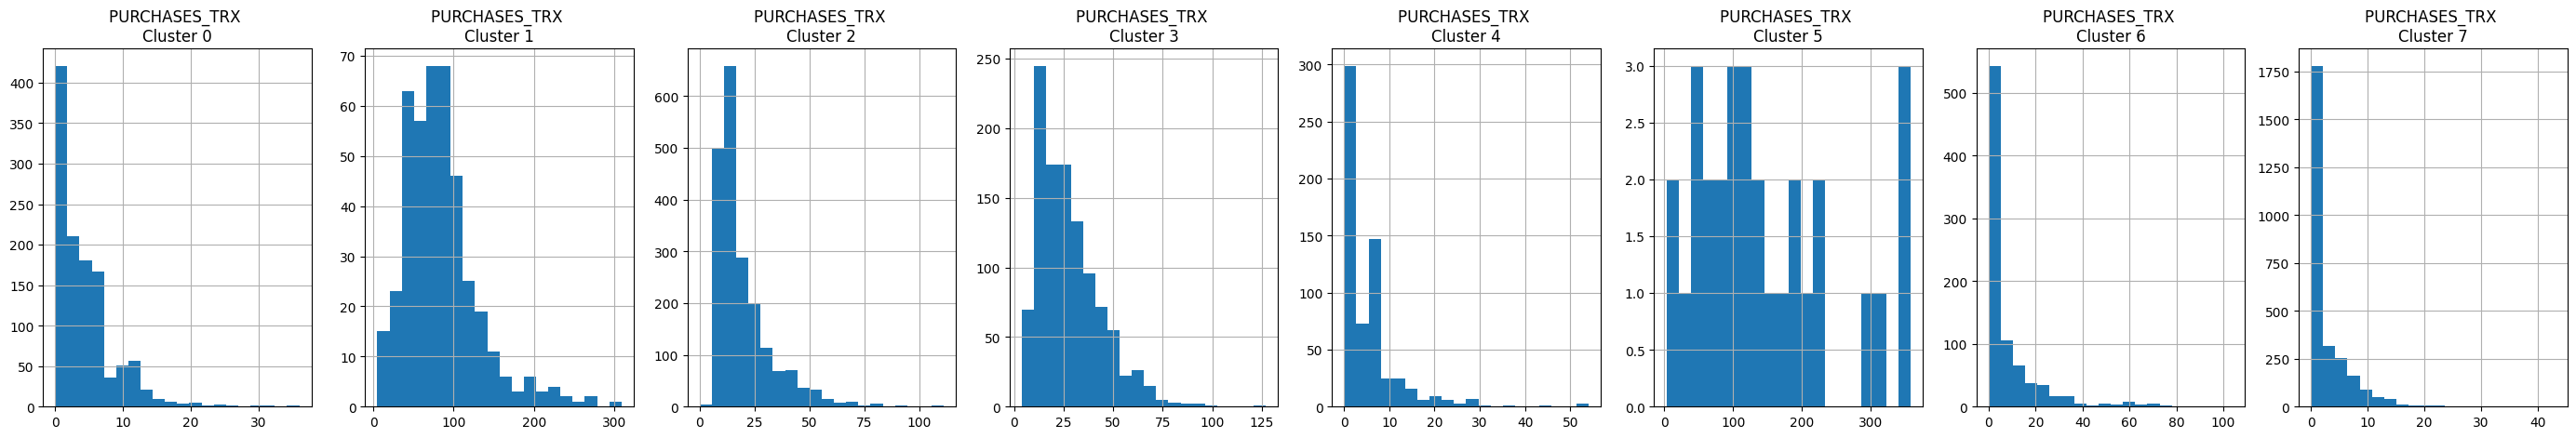

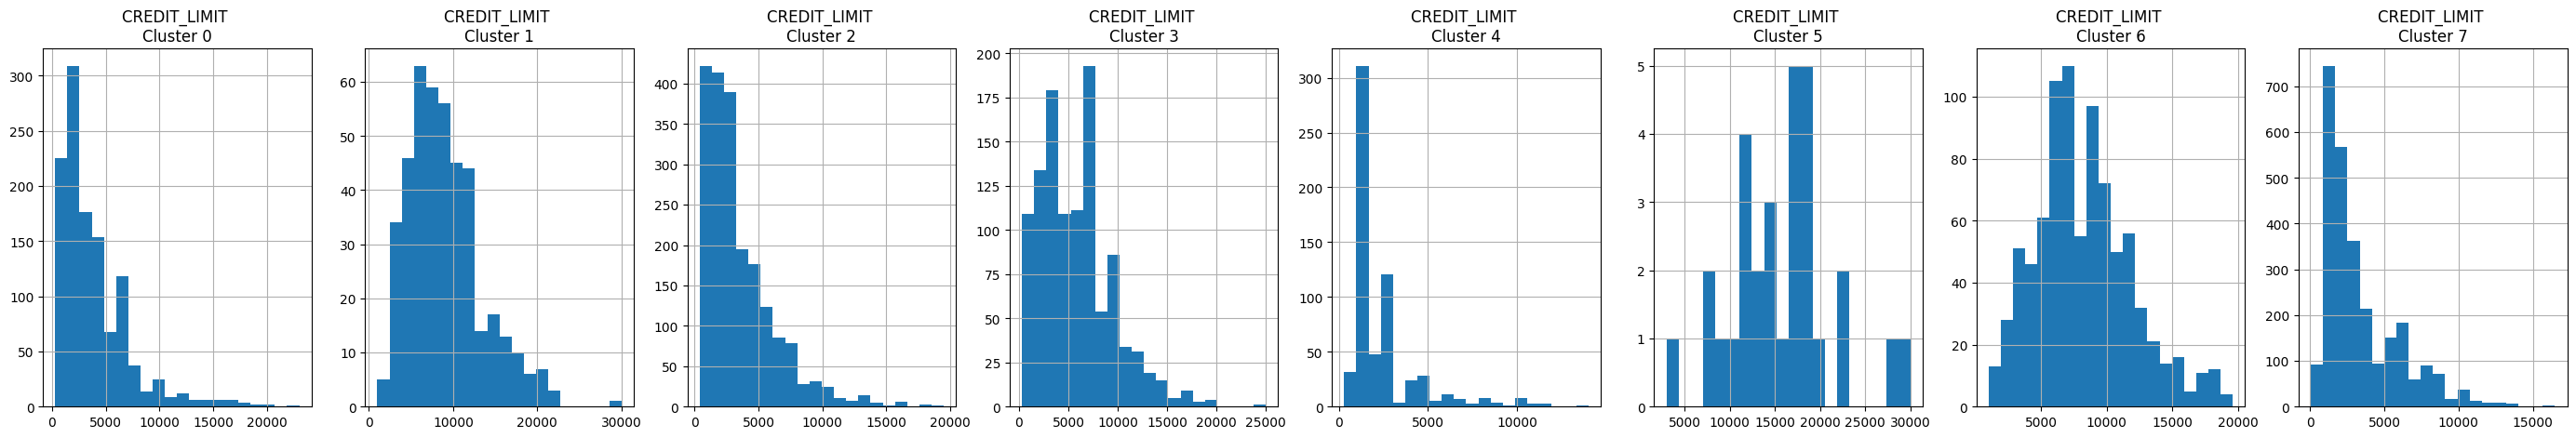

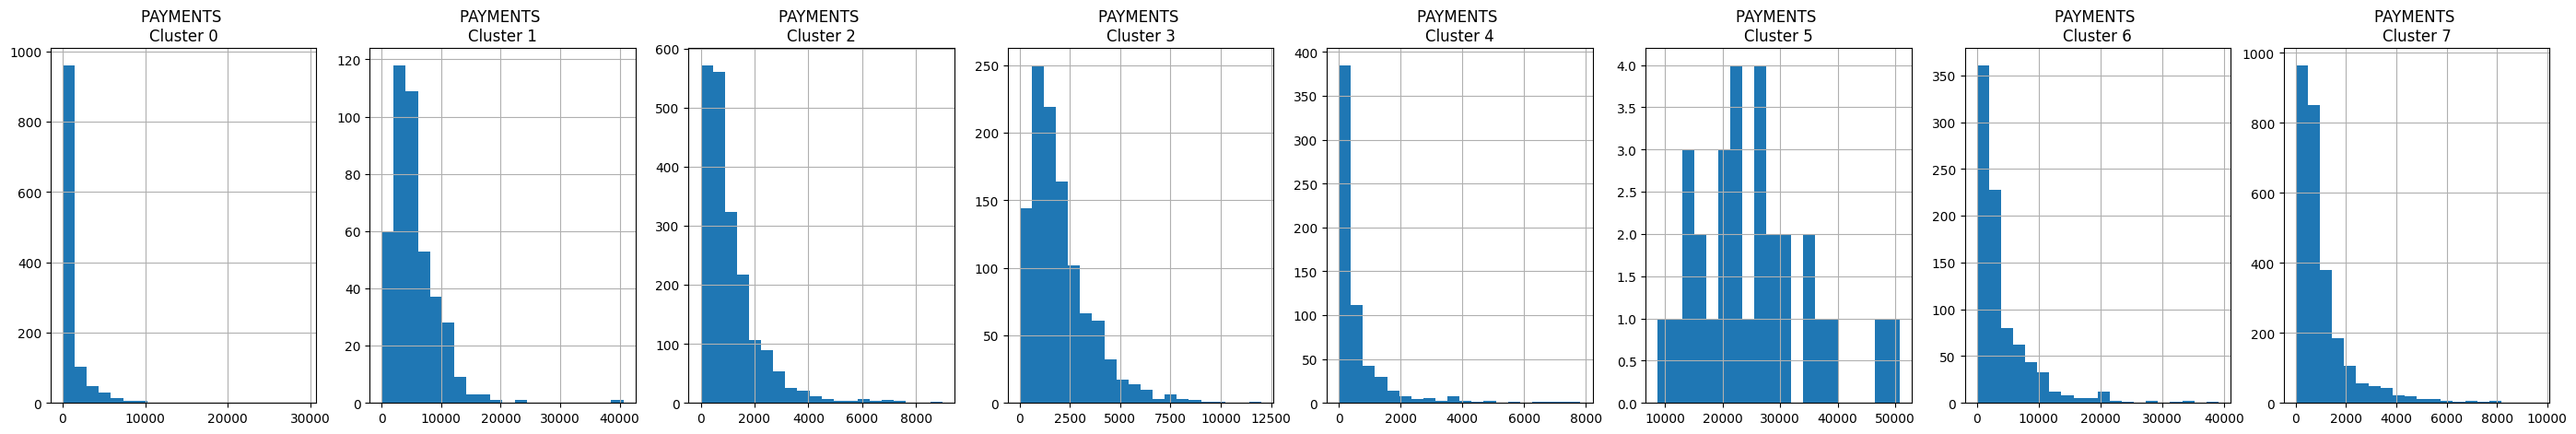

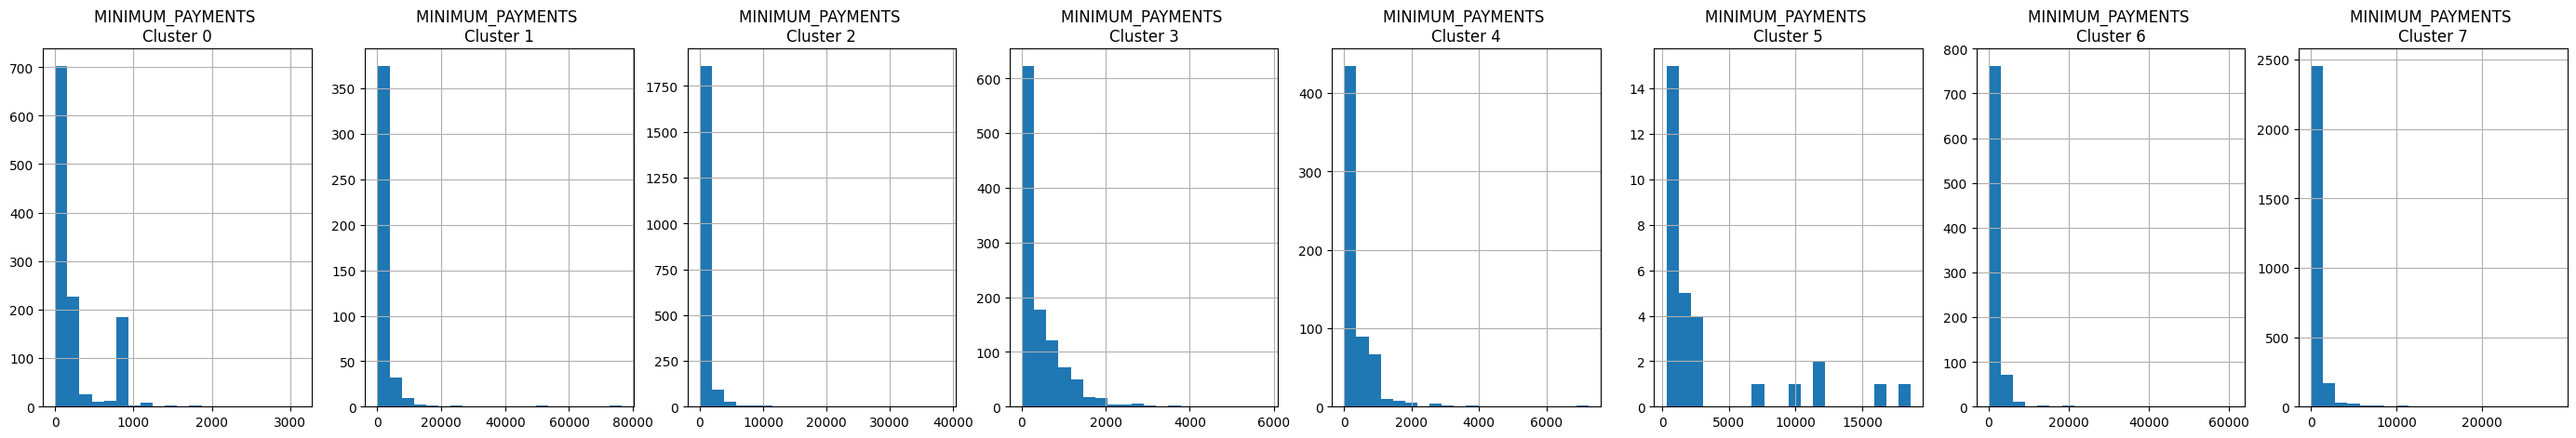

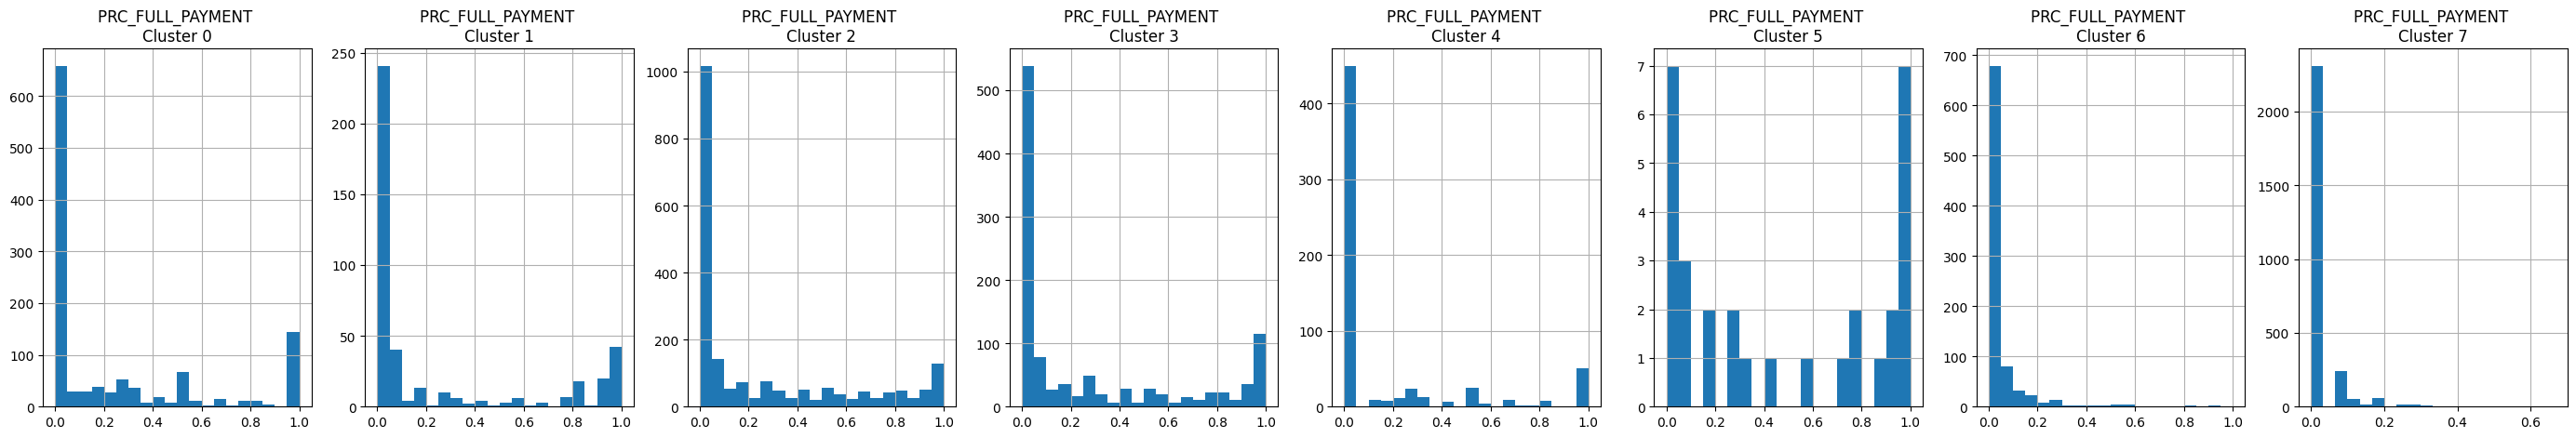

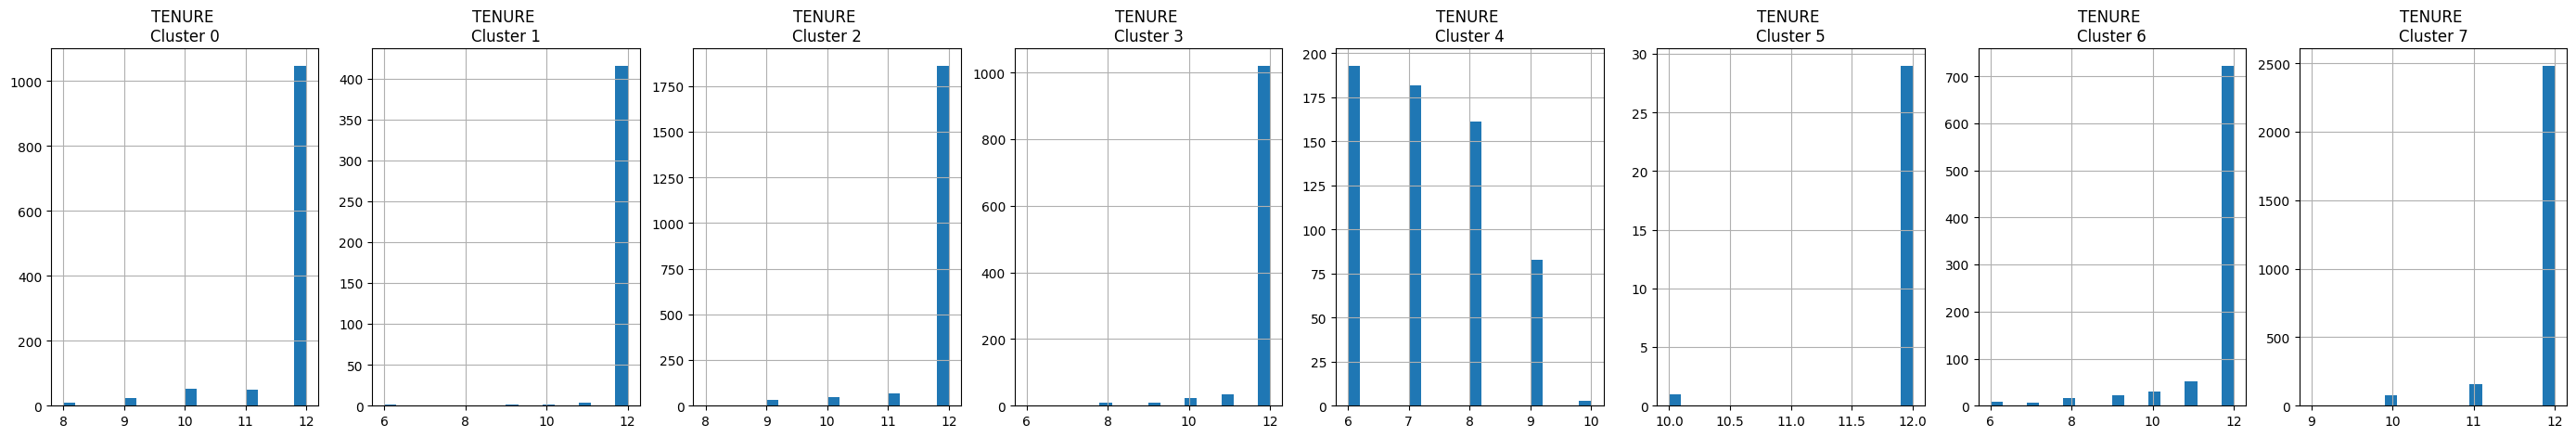

In [94]:
for i in dfCartao.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1,8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i,j))
  plt.show()

In [95]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
6790,30.95716,0.45454,426.25000,0.00000,653.55000,0.00000,0.50000,0.00000,0.50000,0.00000,0,19,1200.00000,460.81460,108.77210,0.00000,12,0
8273,44.54073,0.63636,446.62000,88.47000,358.15000,0.00000,0.58333,0.08333,0.41667,0.00000,0,9,4000.00000,734.81514,190.91060,0.80000,12,0
2321,9.72453,0.27273,158.34000,0.00000,158.34000,0.00000,0.33333,0.00000,0.33333,0.00000,0,4,6000.00000,182.17551,55.48048,0.36364,12,0
8277,84.98884,0.40000,280.00000,280.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0,1,2500.00000,374.04253,136.95889,0.00000,10,0
2308,21.37771,0.63636,312.10000,0.00000,312.10000,0.00000,0.58333,0.00000,0.58333,0.00000,0,7,2000.00000,497.12717,145.60573,1.00000,12,0


In [97]:
credit_ordered.tail()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4647,884.23098,1.00000,0.00000,0.00000,0.00000,611.76416,0.00000,0.00000,0.00000,0.08333,2,0,1200.00000,883.94380,216.19582,0.00000,12,7
4650,398.72628,1.00000,393.49000,393.49000,0.00000,787.21540,0.16667,0.16667,0.00000,0.25000,8,12,600.00000,795.86039,213.54801,0.00000,12,7
4654,2173.97060,1.00000,0.00000,0.00000,0.00000,1192.78617,0.00000,0.00000,0.00000,0.25000,4,0,2400.00000,445.86603,1043.14847,0.00000,12,7
4603,992.61505,1.00000,162.28000,0.00000,162.28000,0.00000,0.50000,0.00000,0.50000,0.00000,0,6,1000.00000,333.66357,462.34583,0.00000,12,7
4474,5256.69533,1.00000,188.60000,188.60000,0.00000,1934.41870,0.08333,0.08333,0.00000,0.33333,4,1,9000.00000,1421.95464,1452.24965,0.00000,12,7


In [98]:
#gerando csv para o departamento com clientes clusterizados
credit_ordered.to_csv('cluster.csv')

In [99]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(dfCartaoScalado)
principal_comp

array([[-1.68222075, -1.07644903],
       [-1.13829655,  2.50648572],
       [ 0.96968519, -0.38352079],
       ...,
       [-0.92620359, -1.81078784],
       [-2.33655159, -0.65796946],
       [-0.55642095, -0.40047081]])

In [101]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1','pca2'])


In [102]:
pca_df.head()

,pca1,pca2
0,-1.68222,-1.07645
1,-1.13830,2.50649
2,0.96969,-0.38352
3,-0.87363,0.04317
4,-1.59943,-0.68858


In [103]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.68222,-1.07645,7
1,-1.13830,2.50649,6
2,0.96969,-0.38352,3
3,-0.87363,0.04317,7
4,-1.59943,-0.68858,7


<Axes: xlabel='pca1', ylabel='pca2'>

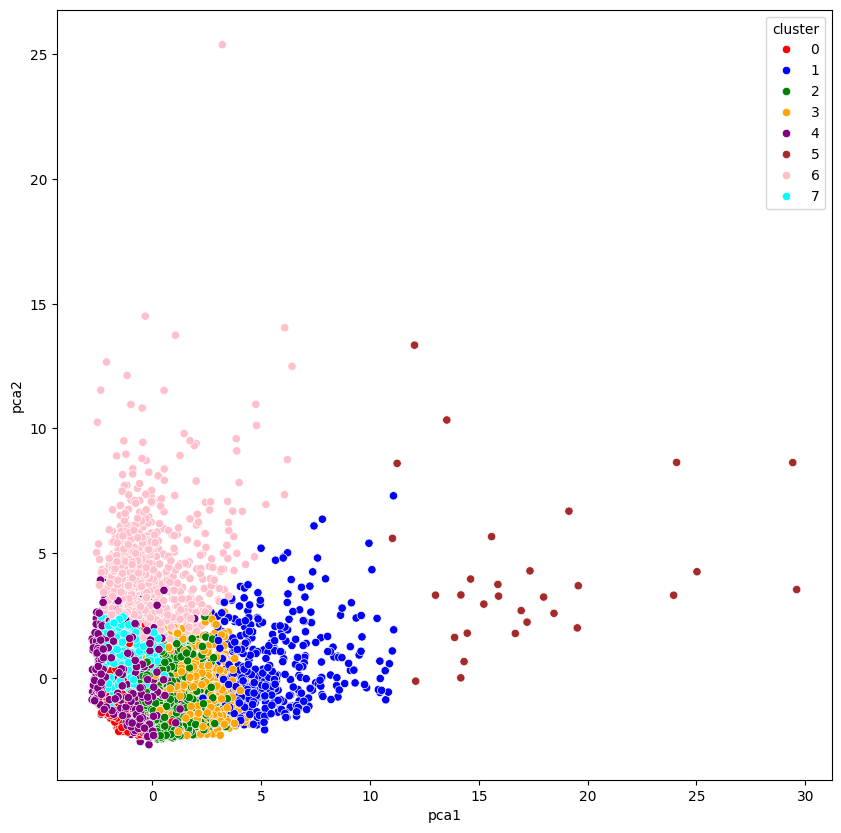

In [107]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan'])
